# `STEP.1` Import all the required `packages`


In [1]:
# If you have not install these packages simply write
# !pip install tensorflow
# !pip install matplotlib
# !pip install IPython
# !pip install opencv


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

# Import data into tensorflow dataset object

`I make two subfolders for training , and testing purposes...`

# `processing` the` training data...`

In [20]:
IMAGE_SIZE = 256    # 500,400
CHANNELS   =3

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAIN_DATA_GEN = ImageDataGenerator(
                rescale   = 1./255,
                rotation_range=10,
                horizontal_flip=True
                )


TRAIN_GENERATOR = TRAIN_DATA_GEN.flow_from_directory(
                   "train_dataset",
                   target_size=(IMAGE_SIZE,IMAGE_SIZE),
                   batch_size=5,
                   class_mode="sparse"            

                   )




Found 673 images belonging to 5 classes.


In [22]:
TRAIN_GENERATOR.class_indices

{'Bread': 0, 'Daal': 1, 'Qorma': 2, 'Rice': 3, 'Vegetables': 4}

In [23]:
# these are our classes names...

In [24]:
CLASS_NAMES = list(TRAIN_GENERATOR.class_indices.keys())
CLASS_NAMES

['Bread', 'Daal', 'Qorma', 'Rice', 'Vegetables']

(256, 256, 3)


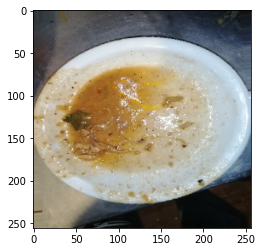

In [25]:
COUNT=0
for IMAGE_BATCH,LABEL_BATCH in TRAIN_GENERATOR:
    first_image=IMAGE_BATCH[0]
    print(first_image.shape)
    plt.imshow(first_image)
    
    break
  


# preprocessing the test data...

In [26]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'test_dataset',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=5,
        class_mode="sparse"
)

Found 673 images belonging to 5 classes.


In [27]:
for image_batch, label_batch in test_generator:
    f_img=image_batch[0]
    print(f_img.shape)
    break

(256, 256, 3)


# ` Now upto here our data processing process have been completed now is the step to Building model...`

# `Step.3`  `Building the Model`

In [28]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=5    #  defect and good beverages  are the two classes....


In [29]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

# `Compiling the Model`
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Step.5  `Fitting` our model on given `test_dataset Images`


In [33]:
history = model.fit(
    TRAIN_GENERATOR,
    steps_per_epoch=15,
    batch_size=10,
    verbose=1,
    epochs=100,
)

Epoch 1/100
15/15 [==============================] - 8s 530ms/step - loss: 1.3863 - accuracy: 0.3600
Epoch 2/100
15/15 [==============================] - 8s 543ms/step - loss: 1.1867 - accuracy: 0.4267
Epoch 3/100
15/15 [==============================] - 8s 514ms/step - loss: 1.4952 - accuracy: 0.3333
Epoch 4/100
15/15 [==============================] - 8s 527ms/step - loss: 1.2838 - accuracy: 0.4533
Epoch 5/100
15/15 [==============================] - 8s 527ms/step - loss: 1.2418 - accuracy: 0.5600
Epoch 6/100
15/15 [==============================] - 8s 528ms/step - loss: 0.9932 - accuracy: 0.5867
Epoch 7/100
15/15 [==============================] - 8s 511ms/step - loss: 1.0503 - accuracy: 0.4800
Epoch 8/100
15/15 [==============================] - 8s 504ms/step - loss: 0.8592 - accuracy: 0.6438
Epoch 9/100
15/15 [==============================] - 8s 540ms/step - loss: 0.9450 - accuracy: 0.5600
Epoch 10/100
15/15 [==============================] - 8s 521ms/step - loss: 0.9182 - accura

15/15 [==============================] - 9s 608ms/step - loss: 0.2729 - accuracy: 0.8933
Epoch 82/100
15/15 [==============================] - 9s 569ms/step - loss: 0.2957 - accuracy: 0.8933
Epoch 83/100
15/15 [==============================] - 8s 538ms/step - loss: 0.1304 - accuracy: 0.9733
Epoch 84/100
15/15 [==============================] - 8s 544ms/step - loss: 0.2731 - accuracy: 0.9067
Epoch 85/100
15/15 [==============================] - 8s 524ms/step - loss: 0.2057 - accuracy: 0.9200
Epoch 86/100
15/15 [==============================] - 8s 516ms/step - loss: 0.2828 - accuracy: 0.9200
Epoch 87/100
15/15 [==============================] - 8s 545ms/step - loss: 0.1191 - accuracy: 0.9600
Epoch 88/100
15/15 [==============================] - 8s 538ms/step - loss: 0.1526 - accuracy: 0.9600
Epoch 89/100
15/15 [==============================] - 8s 530ms/step - loss: 0.1376 - accuracy: 0.9467
Epoch 90/100
15/15 [==============================] - 8s 527ms/step - loss: 0.1310 - accuracy: 

In [35]:
scores = model.evaluate(test_generator)

135/135 [==============================] - 55s 409ms/step - loss: 0.1660 - accuracy: 0.9391


In [36]:
scores

[0.16601788997650146, 0.9390787482261658]

`Scores` is just a list containing `loss` and `accuracy` value
`Loss`= `0.16601788997650146`
`accuracy` = `0.9390787482261658`

In [37]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 15}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

`loss`, `accuracy`, val loss etc are a `python list` containing values of loss, `accuracy` etc at the end of each `epochs`

In [39]:
type(history.history['loss'])

list

In [40]:
len(history.history['loss'])

100

In [59]:
loss = history.history['loss'][99]   
loss

0.13894985616207123

In [49]:
acc = history.history['accuracy'][99]
acc

0.9466666579246521

In [51]:
acc = history.history['accuracy']

loss = history.history['loss']


In [52]:
acc

[0.36000001430511475,
 0.4266666769981384,
 0.3333333432674408,
 0.4533333480358124,
 0.5600000023841858,
 0.5866666436195374,
 0.47999998927116394,
 0.6438356041908264,
 0.5600000023841858,
 0.6399999856948853,
 0.5066666603088379,
 0.6800000071525574,
 0.6399999856948853,
 0.6399999856948853,
 0.6266666650772095,
 0.7599999904632568,
 0.767123281955719,
 0.7599999904632568,
 0.6800000071525574,
 0.7333333492279053,
 0.746666669845581,
 0.746666669845581,
 0.8533333539962769,
 0.6666666865348816,
 0.7200000286102295,
 0.7534246444702148,
 0.8133333325386047,
 0.6666666865348816,
 0.8266666531562805,
 0.6933333277702332,
 0.7866666913032532,
 0.6933333277702332,
 0.7200000286102295,
 0.746666669845581,
 0.8133333325386047,
 0.8666666746139526,
 0.8133333325386047,
 0.800000011920929,
 0.8630136847496033,
 0.8266666531562805,
 0.8266666531562805,
 0.7866666913032532,
 0.835616409778595,
 0.8266666531562805,
 0.7599999904632568,
 0.9066666960716248,
 0.8082191944122314,
 0.87999999523162

# STEP NO:7-->

 # STEP.7  Run `prediction` on a `test_dataset_image`

first image to predict
actual label: Rice
predicted label: Rice


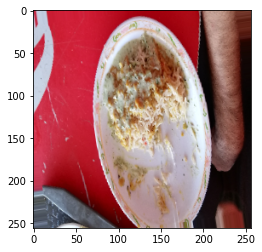

In [54]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",CLASS_NAMES[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",CLASS_NAMES[np.argmax(batch_prediction[0])])
    
    break

# Write a function for inference


In [55]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# **Now run inference on few sample images**

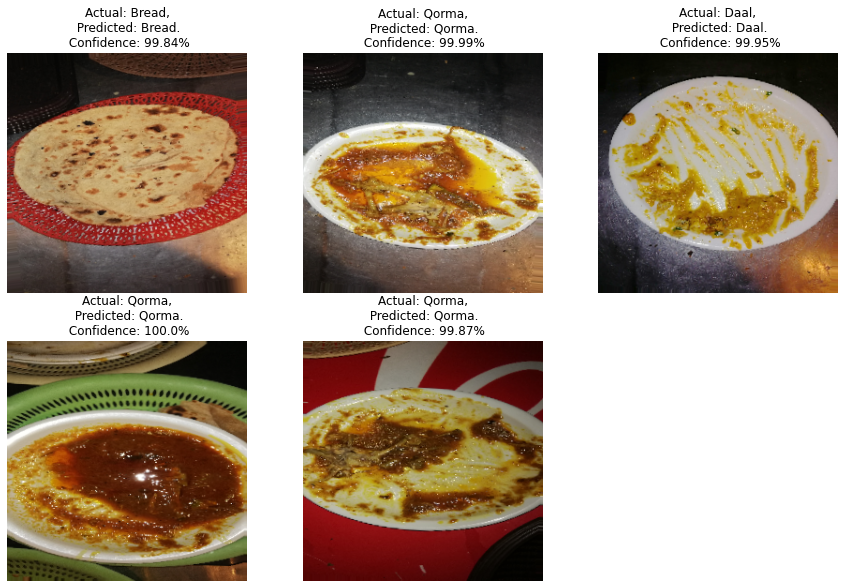

In [57]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = CLASS_NAMES[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

you can see in the prediction our model is working with superb `accuracy`
OOoohh Finally we completed our cool project

# `Last_Step_8`  `Saving the model...`

# Saving the Model

Save model in `h5 format` so that there is just one file and we can upload that to GCP conveniently

In [58]:
model.save("../CNN_detection.h5")